In [120]:
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
data = shuffle(pd.read_csv("music.csv"))


In [122]:
data.shape

(1000, 28)

In [123]:
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
751,pop.00051.wav,0.447051,5.713659,4156.047953,3451.254770,8676.405868,0.230045,-14.143276,44.389580,12.682171,...,-0.866477,3.806729,1.664475,1.505237,-0.191124,-1.022330,4.780417,4.864114,3.055194,pop
938,rock.00038.wav,0.411539,4.750198,2794.957194,2633.944002,5862.414551,0.140550,-15.900696,67.150525,-20.123927,...,1.096384,-1.739961,5.707216,-0.592025,1.724953,-1.576261,1.581885,0.414775,2.936304,rock
503,jazz.00003.wav,0.319313,-5.560664,813.293729,1058.898921,1417.008098,0.044674,-297.215109,193.096518,10.161530,...,0.378860,-4.962201,3.240837,-4.476338,-1.891066,-2.272844,3.883316,0.344252,-2.214156,jazz
500,jazz.00000.wav,0.344568,-7.565382,1504.404759,1754.409592,2800.374733,0.078464,-251.967318,137.889999,-11.156484,...,-3.148508,-1.848463,-1.002679,-2.589935,-1.962403,-1.502332,0.221480,-1.991628,-3.348312,jazz
58,blues.00058.wav,0.356588,1.913341,2068.371125,2033.930047,4231.499413,0.104372,-95.436027,105.216700,-26.953012,...,10.262575,-9.438187,3.867535,-10.187453,3.588093,-3.100753,0.194597,0.842872,-3.416576,blues


In [124]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['label']= label_encoder.fit_transform(data['label']) 
data['filename']=label_encoder.fit_transform(data['filename'])  
data['label'].unique() 
#data['filename'].unique() 

array([7, 9, 5, 0, 2, 8, 4, 1, 6, 3])

In [125]:
X = data.drop('label', axis=1)
y = data['label']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [128]:
k_range = range(2,26)
scores = {}
scores_list = []
error = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    print(scores[k])
    

0.77
0.765
0.775
0.8
0.77
0.785
0.765
0.775
0.76
0.76
0.74
0.735
0.74
0.725
0.72
0.705
0.71
0.695
0.685
0.695
0.69
0.665
0.665
0.67


In [135]:
import numpy as np
from numpy import linalg as LA 
import seaborn as sn

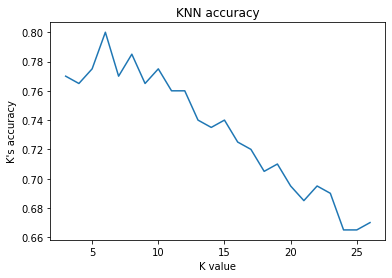

In [136]:
import matplotlib.pyplot as plt
x = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26] 
y = [ 0.77,0.765,0.775,0.8,0.77,0.785,0.765,0.775,0.76,0.76,0.74,0.735,
0.74,0.725,0.72,0.705,0.71,0.695,0.685,0.695,0.69,0.665,0.665,0.67]
plt.plot(x,y)
plt.xlabel("K value")
plt.ylabel("K's accuracy")
plt.title("KNN accuracy")
plt.show()

